In [34]:
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
data = pd.read_csv("/content/drive/MyDrive/mtsamples.csv")

In [36]:
data.isna().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [37]:
 data.shape

(4999, 6)

In [38]:
data = data.dropna(subset = ['transcription']).reset_index(drop=True)

In [39]:
 data.shape

(4966, 6)

In [40]:
data.medical_specialty.unique().shape

(40,)

In [41]:
data['description'] = data['description'].str.lower()
data['transcription'] = data['transcription'].str.lower()
data["medical_specialty"] = data["medical_specialty"].str.strip()

In [42]:
data.isna().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription           0
keywords             1068
dtype: int64

In [43]:
cause_dist = data['medical_specialty'].value_counts()

In [44]:
print (cause_dist)

Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surgery         27
Dentistry                          27
Letters     

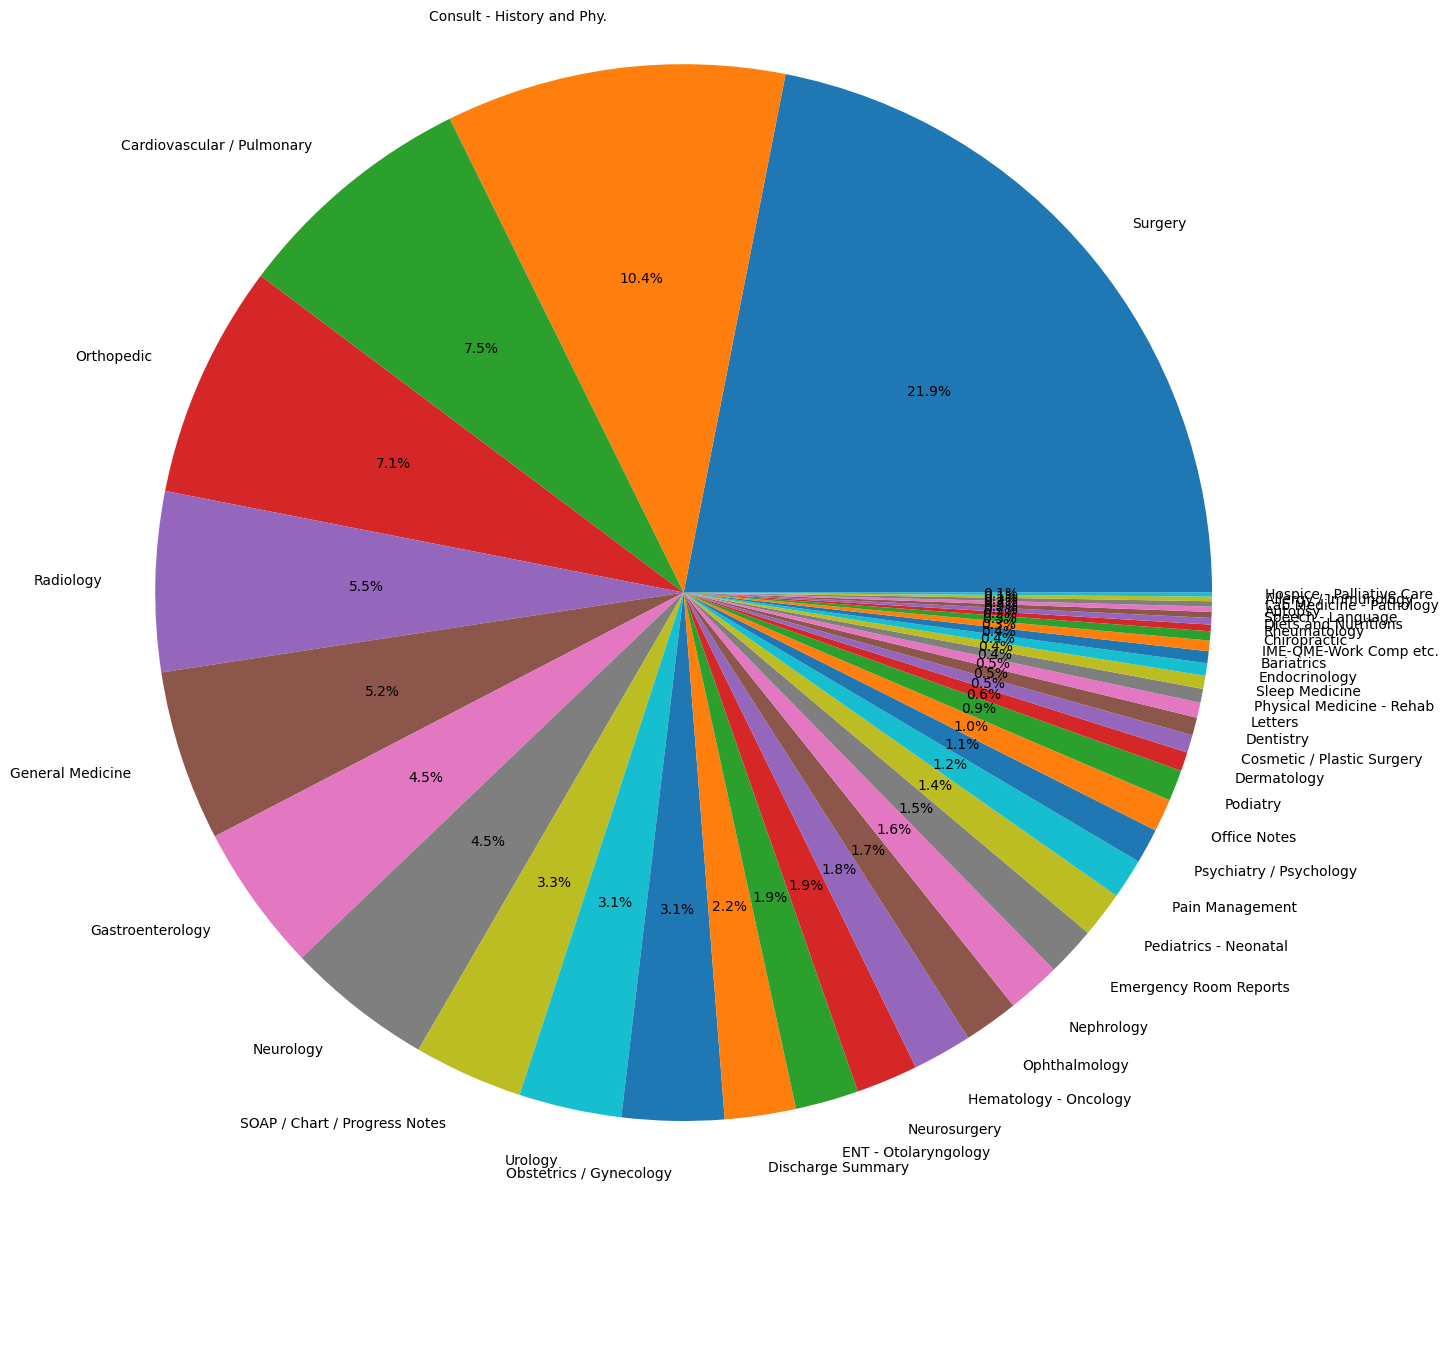

In [45]:
plt.figure(figsize=(15,15))
plt.title(' ', y=-0.15)
plt.pie(cause_dist, labels=list(cause_dist.index), autopct="%.1f%%")
plt.axis('equal');

In [46]:
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,a 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"subjective:, this 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"past medical history:, he has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-d m-mode. doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode: , ,1. left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-d echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. the left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [47]:
data['medical_specialty'] = pd.Categorical(data['medical_specialty'])

In [48]:
print(data['medical_specialty'])

0             Allergy / Immunology
1                       Bariatrics
2                       Bariatrics
3       Cardiovascular / Pulmonary
4       Cardiovascular / Pulmonary
                   ...            
4961          Allergy / Immunology
4962          Allergy / Immunology
4963          Allergy / Immunology
4964          Allergy / Immunology
4965          Allergy / Immunology
Name: medical_specialty, Length: 4966, dtype: category
Categories (40, object): ['Allergy / Immunology', 'Autopsy', 'Bariatrics', 'Cardiovascular / Pulmonary', ...,
                          'Sleep Medicine', 'Speech - Language', 'Surgery', 'Urology']


In [49]:
data['medical_specialty'].cat.categories

Index(['Allergy / Immunology', 'Autopsy', 'Bariatrics',
       'Cardiovascular / Pulmonary', 'Chiropractic',
       'Consult - History and Phy.', 'Cosmetic / Plastic Surgery', 'Dentistry',
       'Dermatology', 'Diets and Nutritions', 'Discharge Summary',
       'ENT - Otolaryngology', 'Emergency Room Reports', 'Endocrinology',
       'Gastroenterology', 'General Medicine', 'Hematology - Oncology',
       'Hospice - Palliative Care', 'IME-QME-Work Comp etc.',
       'Lab Medicine - Pathology', 'Letters', 'Nephrology', 'Neurology',
       'Neurosurgery', 'Obstetrics / Gynecology', 'Office Notes',
       'Ophthalmology', 'Orthopedic', 'Pain Management',
       'Pediatrics - Neonatal', 'Physical Medicine - Rehab', 'Podiatry',
       'Psychiatry / Psychology', 'Radiology', 'Rheumatology',
       'SOAP / Chart / Progress Notes', 'Sleep Medicine', 'Speech - Language',
       'Surgery', 'Urology'],
      dtype='object')

In [50]:
data['labels'] = data['medical_specialty'].cat.codes
categories_mapping = dict(enumerate(data['medical_specialty'].cat.categories))


In [51]:
categories_with_more_than_5_count = data['medical_specialty'].value_counts()[5:].keys()
data[data["medical_specialty"].isin(categories_with_more_than_5_count)]

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,labels
0,0,a 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"subjective:, this 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",0
1,1,consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"past medical history:, he has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",2
2,2,consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc ...","bariatrics, laparoscopic gastric bypass, heart...",2
5,5,morbid obesity. laparoscopic antecolic anteg...,Bariatrics,Laparoscopic Gastric Bypass,"preoperative diagnosis: , morbid obesity.,post...","bariatrics, gastric bypass, eea anastomosis, r...",2
6,6,"liposuction of the supraumbilical abdomen, re...",Bariatrics,Liposuction,"preoperative diagnoses:,1. deformity, right b...","bariatrics, breast reconstruction, excess, lma...",2
...,...,...,...,...,...,...,...
4961,4994,patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"history:, i had the pleasure of meeting and e...",NaN,0
4962,4995,this is a 14-month-old baby boy caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis: , kawasaki disease.,disch...","allergy / immunology, mucous membranes, conjun...",0
4963,4996,a female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"subjective: , this is a 42-year-old white fema...",NaN,0
4964,4997,mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"chief complaint: , this 5-year-old male presen...",NaN,0
